  <a id='top'></a>
 # odtcalc  : expérience helium1
 
 

In [2]:
# -- global imports
import sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as csts
import skimage
from numpy import pi
from heliumtools import odtcalc
from heliumtools.atom import Helium
from heliumtools.odtcalc.laser import GaussianBeam
from heliumtools.odtcalc.trap import Trap
he = Helium()
# -- setup matplotlib
%matplotlib inline 
plt.rcParams.update({'font.size': 12})


>> horizontal
 + depth = 465 nK
 + f_rad = 73.3 Hz
 + f_ax  = 189 mHz
------------------------------
>> vertical
 + depth = 23.5 µK
 + f_rad = 1.65 kHz
 + f_ax  = 13.6 Hz
------------------------------
Contours : 
[ 0.          4.74049664  9.48099328 14.22148992 18.96198656 23.7024832 ]


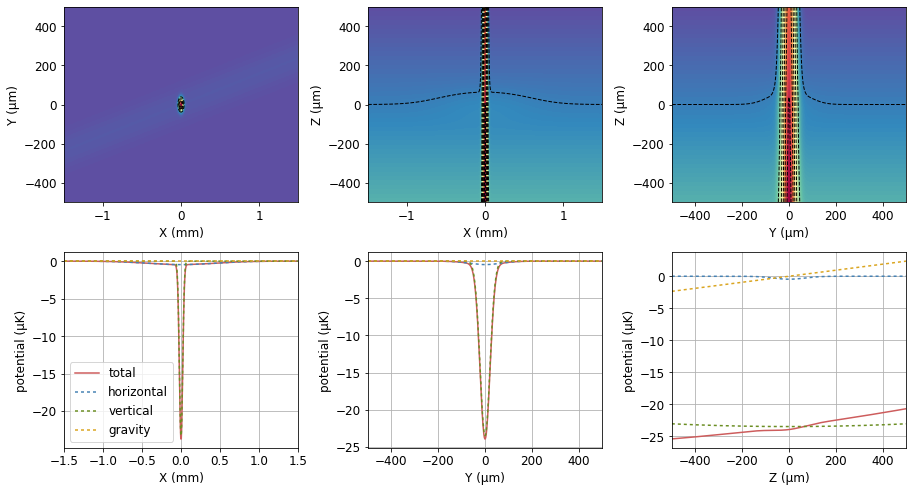

In [15]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertial_power = 0.5
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertial_power,
         'theta': 0 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

beamH = {'waist_value': 135e-6,
         'power': 0.1 ,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': 9 * pi / 180,
         'waist_position':(0,0,0),
         'label': 'horizontal'}

odt = Trap(atom=Helium())  

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

# -- setup trap
odt.add_laser(**beamH)
odt.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

## Fit du waist
En diminuant la puissance du faisceau vertical, le nuage tombe vers le bas et de sa position, on peut récupérer le waist du faisceau (NB : le fit se fait 'à la main' ci-dessous).

No value for 0.572222222


/home/victor/VirtualEnv/vikenv/lib/python3.9/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/victor/VirtualEnv/vikenv/lib/python3.9/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


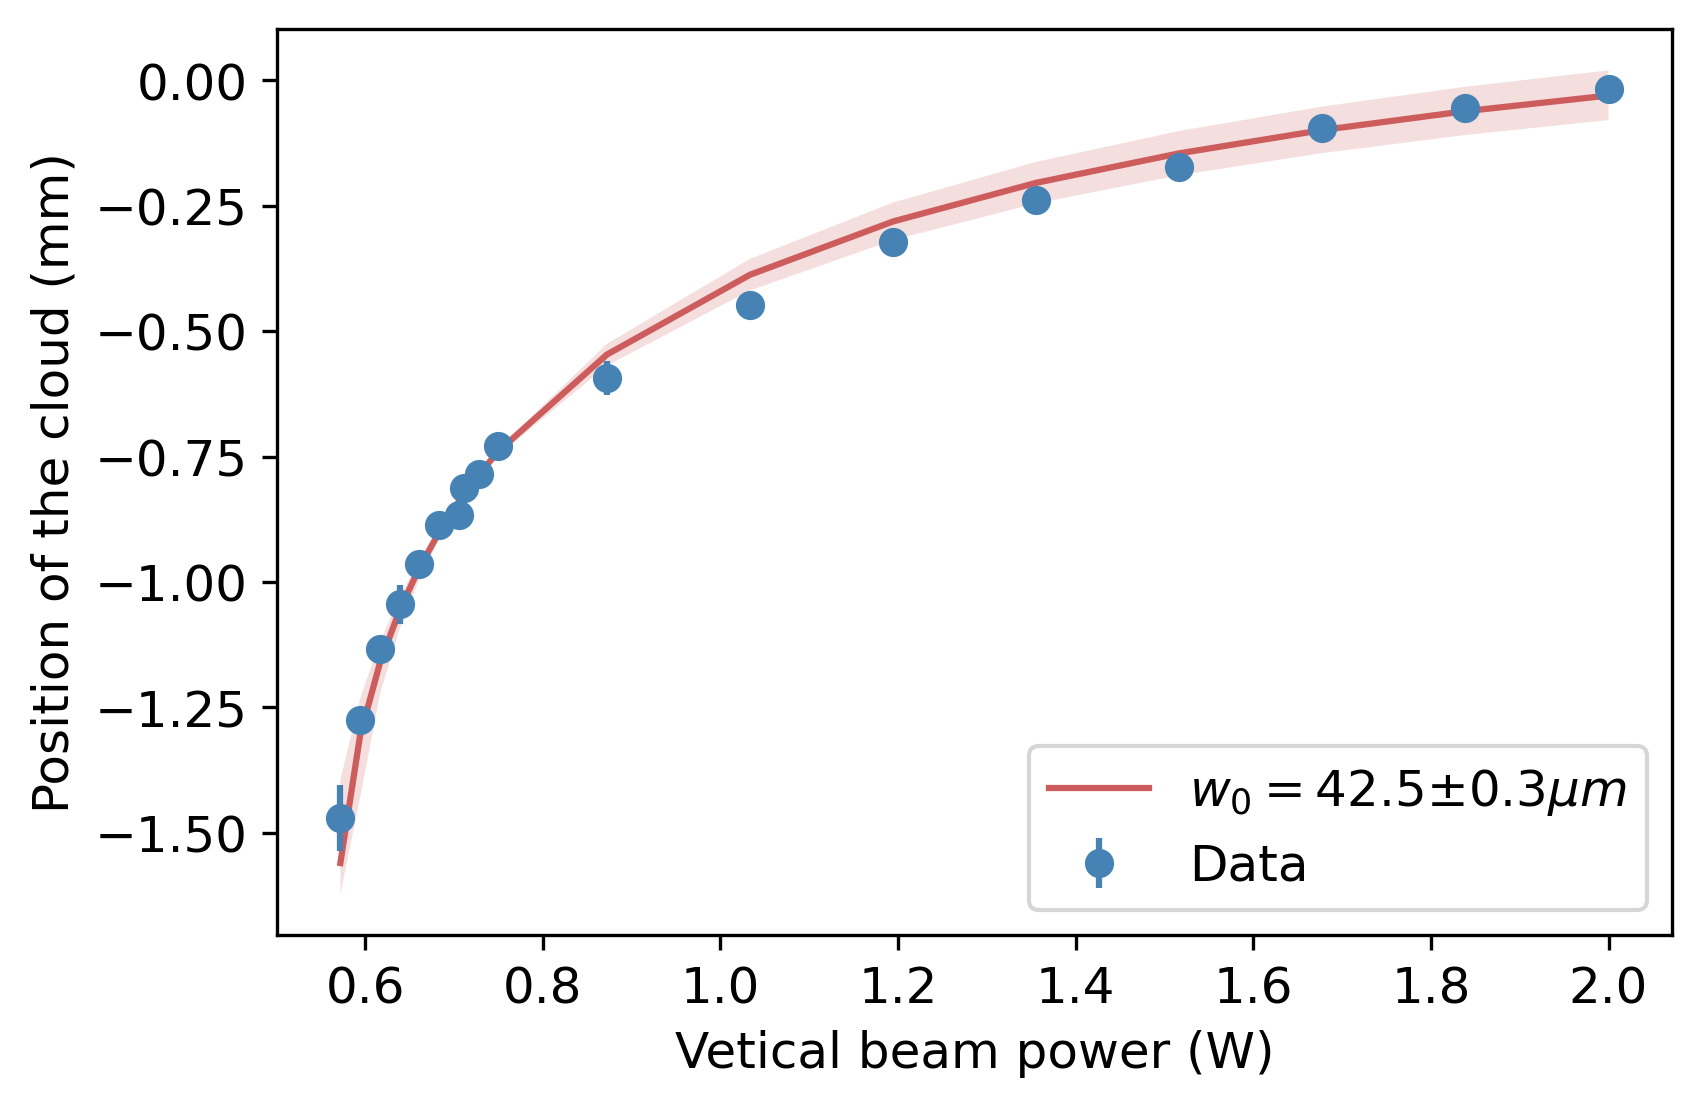

In [8]:
from heliumtools.odtcalc.trap import Trap
from heliumtools.atom import Helium
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy import pi
import pandas as pd
from numpy import genfromtxt
#### Parameters of the code : 
waist_value = 42.5e-6  # waist du faisceau en mètres
u_waist_value = 0.3e-6


### LOAD EXPERIMENTAL DATA
## Data : 
data = [[ 5.22883942e+00, 8.72222222e-01,1.56514789e+04], [ 4.84680661e+00,1.03333333e+00,1.55753012e+04],[ 4.76145333e+00,1.19444444e+00,1.54935712e+04],[ 4.44575296e+00,1.35555556e+00,1.54327615e+04],
[ 4.20842461e+00,1.51666667e+00,1.53898054e+04],[ 4.24815920e+00,1.67777778e+00,1.53230171e+04],[ 4.24778334e+00,1.83888889e+00,1.52888464e+04],[ 4.32185958e+00,2.00000000e+00,1.52665281e+04],
[ 7.99440635e+00,5.50000000e-01,1.65002340e+04],[ 5.83242962e+00,7.11111111e-01,1.58322732e+04],[ 4.97892699e+00,8.72222222e-01,1.56997432e+04],[ 5.01987259e+00,1.03333333e+00,1.55842913e+04],
[ 4.71448295e+00,1.19444444e+00,1.54921903e+04],[ 4.61381091e+00,1.35555556e+00,1.54193620e+04],[ 4.27934557e+00,1.51666667e+00,1.53803063e+04],[ 4.25331581e+00,1.67777778e+00,1.53337724e+04],
[ 4.15954869e+00,1.83888889e+00,1.52948342e+04],[ 4.20425854e+00,2.00000000e+00,1.52814598e+04],[ 8.16390236e+00,5.50000000e-01,1.65520534e+04],[ 5.94639368e+00,7.11111111e-01,1.58315345e+04],
[ 5.07290987e+00,8.72222222e-01,1.56774220e+04],[ 4.87937458e+00,1.03333333e+00,1.55616854e+04],[ 4.65317830e+00,1.19444444e+00,1.54665851e+04],[ 4.57331745e+00,1.35555556e+00,1.54253912e+04],
[ 4.32337812e+00,1.51666667e+00,1.53660308e+04],[ 4.35476420e+00,1.67777778e+00,1.53155437e+04],[ 4.10139548e+00,1.83888889e+00,1.53012268e+04],[ 4.11695438e+00,2.00000000e+00,1.52565456e+04],
[ 6.09383543e+00,6.38888889e-01,1.59754324e+04],[ 6.19368645e+00,6.16666667e-01,1.60526706e+04],[ 6.18470315e+00,5.94444444e-01,1.61692955e+04],[ 6.51686920e+00,5.72222222e-01,1.63298723e+04],
[ 7.25946028e+00,5.50000000e-01,1.65523031e+04],[ 5.67323178e+00,7.50000000e-01,1.57717108e+04],[ 5.88171979e+00,7.27777778e-01,1.58111124e+04],[ 6.02539714e+00,7.05555556e-01,1.58687301e+04],
[ 6.00933352e+00,6.83333333e-01,1.58830601e+04],[ 6.17150044e+00,6.61111111e-01,1.59378077e+04],[ 6.17246691e+00,6.38888889e-01,1.60142511e+04],[ 6.35101707e+00,6.16666667e-01,1.60627186e+04],
[ 6.79122625e+00,5.94444444e-01,1.61469737e+04],[ 6.81760445e+00,5.72222222e-01,1.62641445e+04],[ 7.43792659e+00,5.50000000e-01,1.65027282e+04]]
df0 = pd.DataFrame(
    data=data, index=None, columns=["cy_err", "power", "cy"]
)
df0["cy"] = df0["cy"] - np.min(df0["cy"])
df0 = df0[df0["power"] > 0.555]
df = df0.groupby(["power"]).mean()
df3 = df0.groupby(["power"]).std()
df["cy_err"] = df3["cy"]
df["cy_err"] = df["cy_err"] * np.sqrt(2)
df["cy"] = df["cy"] * np.sqrt(2) * (-1)
# df = df.sort_values(["power", "cy"])
df = df.reset_index(drop=False)

### COMPUTE THEORETICAL POSITION OF THE TRAP FOR GIVEN WAIST
def obtain_position(
    df,
    waist_value,
):
    import numpy as np

    theoretical_position = np.zeros(len(df))
    for index, power in enumerate(df["power"]):
        # -- setup trap
        # init trap object
        odt = Trap(atom=Helium())  # NB: atom is Helium by default
        odt.add_laser(
            wavelength=1550e-9,  # meters
            power=power,  # Watts
            waist_value=waist_value,  # meters
            waist_position=(0, 0, 0),  # x, y, z
            waist_shift=0,  # to define a shift along the laser axis
            phi=0,  # angle of propagation in x/y plane
            theta=0,  # angle of propagation, wrt z axis
            label="Vertical laser Beam",
        )
        # trap general settings
        # enables gravity (True by default)
        odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

        z = np.linspace(-8e-3, 0, 100000)
        U, indiv = odt.potential(0, 0, z, yield_each_contribution=True, unit="µK")
        import numpy as np
        from scipy.signal import argrelextrema

        arg = argrelextrema(U, np.less)
        if arg[0].size > 0:
            theoretical_position[index] = z[arg[0][0]] * 1e6  # en micrometres
        else:
            print("No value for {}".format(power))
            theoretical_position[index] = -2000

    theoretical_position = theoretical_position - np.max(theoretical_position)
    theoretical_position += np.mean(df["cy"] - theoretical_position)
    return theoretical_position


theoretical_position = obtain_position(df, waist_value)
theoretical_position_up = obtain_position(df, waist_value + u_waist_value)
theoretical_position_down = obtain_position(df, waist_value - u_waist_value)
# plt.errorbar(x=df["power"], y=df["cy"], yerr=df["cy_err"], fmt="o")
# plt.show()
my_palette = [ "indianred","steelblue","olivedrab","goldenrod","darkslategrey",]
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", my_palette)
plt.figure(dpi=300)
# Plot theory

# Plot error
maxi = np.min([len(theoretical_position_up), len(theoretical_position_down)])
plt.fill_between(
    df["power"],
    theoretical_position_up / 1000,
    theoretical_position_down / 1000,
    alpha=0.2,
)
# plot data
plt.plot(
    df["power"],
    theoretical_position / 1000,
    label=r"$w_0=${}$\pm ${}$\mu m$".format(waist_value * 1e6, u_waist_value * 1e6),
)
plt.errorbar(
    x=df["power"], y=df["cy"] / 1000, yerr=df["cy_err"] / 1000, fmt="o", label="Data"
)

plt.xlabel("Vetical beam power (W)")
plt.ylabel(r"Position of the cloud (mm)")
plt.legend()
plt.show()